In [101]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly.express as px

In [102]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format',  '{:.4f}'.format)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_colwidth', 500)
pd.options.mode.chained_assignment = None

# Introduction: Comprehensive Analysis of Kokam and LG Chem Batteries

**Objective:**

This Jupyter Notebook aims to conduct a comprehensive analysis of both KOKAM SLPB 52495 Pouch Cell and LG Chem INR21700 M5018.20 batteries through a series of charge-discharge cycles. The primary goals are to:

1. **Understand Battery Behavior:** Investigate the charging and discharging characteristics of both battery types, including voltage, current, and capacity.
2. **Compare Battery Performance:** Compare the performance of Kokam and LG Chem batteries in terms of efficiency, capacity retention, and other key metrics.
3. **Build Predictive Models:** Develop machine learning models to predict the capacity of both battery types based on observed data.

**Experimental Setup:**

The experiment involves subjecting both Kokam and LG Chem batteries to multiple charge-discharge cycles, simulating real-world usage conditions. Data on voltage, current, and temperature will be collected throughout these cycles.

**Data Analysis and Visualization:**

Various data visualization techniques will be employed to analyze the battery's performance, including:

- **Charge-Discharge Curves:** Visualizing the voltage and current profiles during charging and discharging.
- **Capacity Analysis:** Tracking changes in battery capacity over time.
- **Power Consumption:** Analyzing the relationship between power consumption and voltage.
- **Correlation Analysis:** Identifying correlations between different variables using a heatmap.
- **Hysteresis Loop:** Illustrating the difference between charge and discharge capacities.

**Charge Factor Calculation:**

The "charge factor" will be calculated to quantify variations in charging and discharging capacities, providing a measure of the battery's efficiency.

**Machine Learning Modeling:**

A range of machine learning models will be trained to predict the capacity of both battery types based on the collected data. Model performance will be evaluated using metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE).

**Key Insights:**

The analysis will provide valuable insights into the performance of both Kokam and LG Chem batteries, including:

- Identification of any inefficiencies or performance degradation.
- Understanding the factors influencing battery capacity.
- Development of predictive models for battery management.
- Comparison of the performance characteristics of Kokam and LG Chem batteries.

These insights can be used to optimize battery management strategies, improve battery life, and ensure reliable performance in various applications.

# KOKAM SLPB 52495 Pouch Cell

## General Specifications

| Item | Specification | Remarks |
|---|---|---|
| 3.1 Nominal Capacity | 3.3 Ah | 0.5C/0.5C, 2.7V cut-off |
| 3.2 Nominal Voltage | 3.7 V | 2.7V - 4.2V |
| 3.3 Charging Method | CC/CV | Constant Current / Constant Voltage |
| 3.4 Charging Current (Std.) | 1.65 A | 0.5C, 0 - 45°C |
| 3.5 Charging Current (Max.) | 6.6 A | 2C |
| 3.6 Charging End Condition | 165 mA | ±0.03V |
| 3.7 Charging Voltage | 4.2 V | |
| 3.8 Charging Time (Std.) | 5 hours | CC + CV mode |
| 3.9 Discharging Current (Std.) | 1.65 A | 0.5C, 20 - 60°C |
| 3.10 Discharging Current (Max.) | 6.6 A | 2C |
| 3.11 Pulse Discharging (Max.) | 9.9 A | 3C, Less than 10 sec. |
| 3.12 Discharge Cut-off Voltage | 3 V | |
| 3.13 Cycle (Min. Capacity) | 2.64 Ah | 1C/1C, 1000cycle@25°C |
| 3.14 Cell Weight | 64.0 g | For bare one cell |
| 3.15 Storage Temperature Range | -20 - 60°C | For up to one month |
| | -20 - 40°C | For up to three months |
| | -20 - 25°C | For up to one year |

### Data Loading and Exploration

In [103]:
# Importing the datafile
df = pd.read_excel('/content/sample_data/kokum_data.xlsx')
df.head()

,Time[h],DataSet,DateTime,t-Step[h],t-Set[h],Line,Command,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Power[W],Charge
0,0.0167,1,17.01.2024 09:25:34,0.0000,0.0167,3,Charge,3.7874,-0.0011,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,1,3,-0.0041,NaN
1,0.0167,2,17.01.2024 09:25:34,0.0000,0.0167,3,Charge,3.8540,1.6980,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,6.5441,0.0000
2,0.0168,3,17.01.2024 09:25:34,0.0000,0.0168,3,Charge,3.8740,1.6484,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,1,1,6.3858,0.0000
3,0.0251,4,17.01.2024 09:26:04,0.0083,0.0251,3,Charge,3.8912,1.6500,0.0137,0.0137,0.0000,0.0137,0.0137,0.0534,1,1,6.4205,0.0137
4,0.0334,5,17.01.2024 09:26:34,0.0167,0.0334,3,Charge,3.8984,1.6500,0.0275,0.0275,0.0000,0.0275,0.0275,0.1070,1,1,6.4324,0.0137


In [104]:
df.isna().sum()

,0
Time[h],0
DataSet,0
DateTime,0
t-Step[h],0
t-Set[h],0
Line,0
Command,0
U[V],0
I[A],0
Ah[Ah],0


In [105]:
df.fillna(method='bfill', inplace=True)

In [106]:
df = df.drop('DateTime', axis=1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time[h]             1247 non-null   float64
 1   DataSet             1247 non-null   int64  
 2   t-Step[h]           1247 non-null   float64
 3   t-Set[h]            1247 non-null   float64
 4   Line                1247 non-null   int64  
 5   Command             1247 non-null   object 
 6   U[V]                1247 non-null   float64
 7   I[A]                1247 non-null   float64
 8   Ah[Ah]              1247 non-null   float64
 9   Ah-Cyc-Charge-0     1247 non-null   float64
 10  Ah-Cyc-Discharge-0  1247 non-null   float64
 11  Ah-Step             1247 non-null   float64
 12  Ah-Set              1247 non-null   float64
 13  Wh[Wh]              1247 non-null   float64
 14  Cyc-Count           1247 non-null   int64  
 15  State               1247 non-null   int64  
 16  Power[

## VISUALISAZTION

In [108]:
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = go.Figure()

# Add traces for Voltage and Current with improved styling
fig.add_trace(
    go.Scatter(
        x=df['Time[h]'],
        y=df['U[V]'],
        name="Voltage",
        line=dict(color='#1f77b4', width=2),  # Blue color with thicker line
        mode='lines+markers',  # Add markers for better visibility
        marker=dict(size=4)
    )
)
fig.add_trace(
    go.Scatter(
        x=df['Time[h]'],
        y=df['I[A]'],
        name="Current",
        line=dict(color='#ff7f0e', width=2),  # Orange color with thicker line
        mode='lines+markers',  # Add markers for better visibility
        marker=dict(size=4),
        yaxis="y2"
    )
)

# Update layout for better visualization
fig.update_layout(
    title='Voltage and Current Over Time',
    xaxis=dict(
        title='Time (hours)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        tickmode='linear',  # Ensure all time ticks are shown
    ),
    yaxis=dict(
        title="Voltage (V)",
        titlefont=dict(color='#1f77b4'),
        tickfont=dict(color='#1f77b4'),
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
    ),
    yaxis2=dict(
        title="Current (A)",
        titlefont=dict(color='#ff7f0e'),
        tickfont=dict(color='#ff7f0e'),
        anchor="x",  # Aligns with the main x-axis
        overlaying="y",
        side="right",
        position=0.95,  # Slightly adjust position to the right
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
    ),
    legend=dict(
        x=0.01, y=0.99,  # Position the legend in the top-left corner
        bordercolor="Black",
        borderwidth=1
    ),
    hovermode='x unified',  # Show a unified tooltip for both lines
    plot_bgcolor='rgba(240, 240, 240, 0.9)'  # Light grey background
)

fig.show()


In [109]:
import plotly.express as px

# Create the line plot with improved styling and additional features
fig = px.line(
    df,
    x='Time[h]',
    y=['Ah-Cyc-Charge-0', 'Ah-Cyc-Discharge-0'],
    title='Ah Cyclic Charge and Discharge Over Time',
    labels={
        'value': 'Charge/Discharge (Ah)',
        'variable': 'Process',
        'Time[h]': 'Time (hours)'
    },
    color_discrete_sequence=["green", "red"]  # Green for charge, red for discharge
)

# Update layout for better visualization
fig.update_layout(
    title=dict(
        text='Ah Cyclic Charge and Discharge Over Time',
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis=dict(
        title='Time (hours)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        tickmode='linear',  # Ensure all time ticks are shown
        showline=True,  # Show the axis line
        linewidth=2,  # Make axis line thicker
        linecolor='black'  # Set axis line color to black
    ),
    yaxis=dict(
        title='Charge/Discharge (Ah)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        showline=True,  # Show the axis line
        linewidth=2,  # Make axis line thicker
        linecolor='black'  # Set axis line color to black
    ),
    legend=dict(
        title='Legend',  # Customize legend title
        x=0.01, y=0.99,  # Position legend in the top-left corner
        bordercolor="Black",
        borderwidth=1
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.9)',  # Light grey background for better contrast
    hovermode='x unified',  # Show both Ah values together when hovering over the graph
    margin=dict(l=50, r=50, t=80, b=50)  # Adjust margins for better spacing
)

# Show the plot
fig.show()


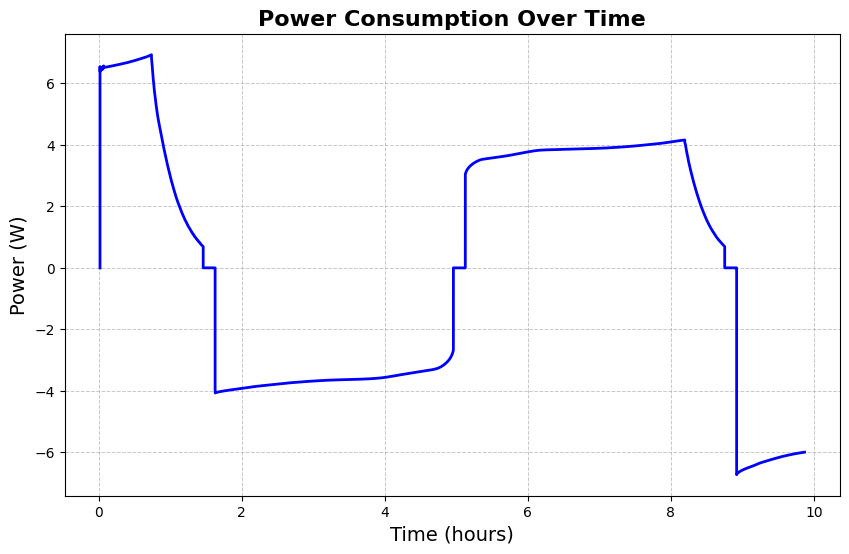

In [110]:
import matplotlib.pyplot as plt

# Improved Time Series Plot for Power Consumption Over Time
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.plot(df['Time[h]'], df['Power[W]'], color='blue', linewidth=2)

# Add title and labels with improved styling
plt.title('Power Consumption Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()


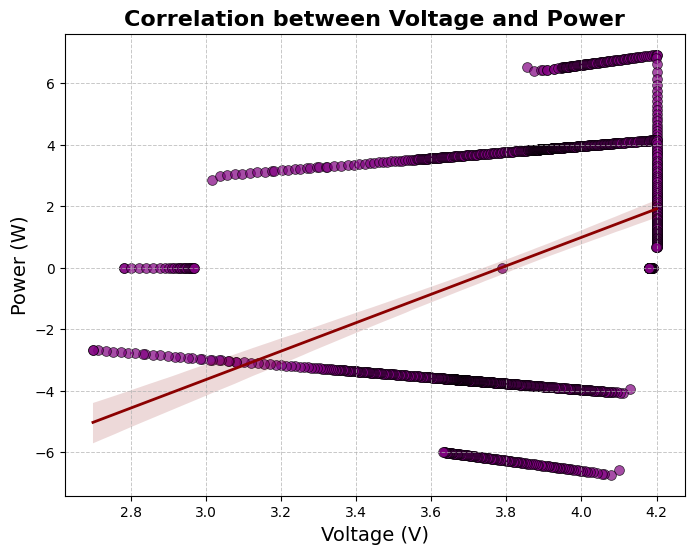

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Enhanced Scatterplot for Correlation between Voltage and Power
sns.scatterplot(
    x='U[V]',
    y='Power[W]',
    data=df,
    color='purple',  # Choose a distinctive color
    s=50,  # Adjust marker size
    alpha=0.7,  # Set transparency for better visualization of overlapping points
    edgecolor='black'  # Add edge color for better definition of points
)

# Add a regression line for better correlation understanding
sns.regplot(
    x='U[V]',
    y='Power[W]',
    data=df,
    scatter=False,
    color='darkred',
    line_kws={"linewidth": 2}
)

# Add title and labels with improved styling
plt.title('Correlation between Voltage and Power', fontsize=16, fontweight='bold')
plt.xlabel('Voltage (V)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

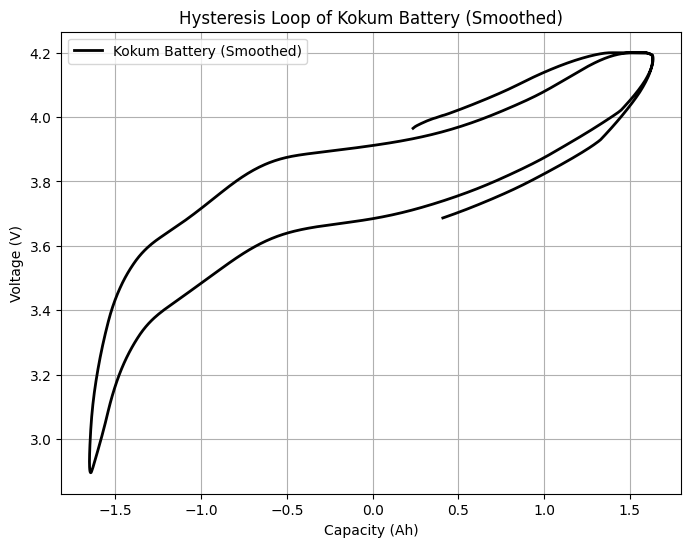

In [112]:
# Defining the variables
voltage = df['U[V]']
capacity = df['Ah[Ah]']

# Apply a rolling average to smooth the data (e.g., window size of 50)
voltage_smooth = voltage.rolling(window=50).mean()
capacity_smooth = capacity.rolling(window=50).mean()

# Plot the smoothed data
plt.figure(figsize=(8, 6))
plt.plot(capacity_smooth, voltage_smooth, label='Kokum Battery (Smoothed)', color='black', linewidth=2)

# Add labels and title
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Hysteresis Loop of Kokum Battery (Smoothed)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

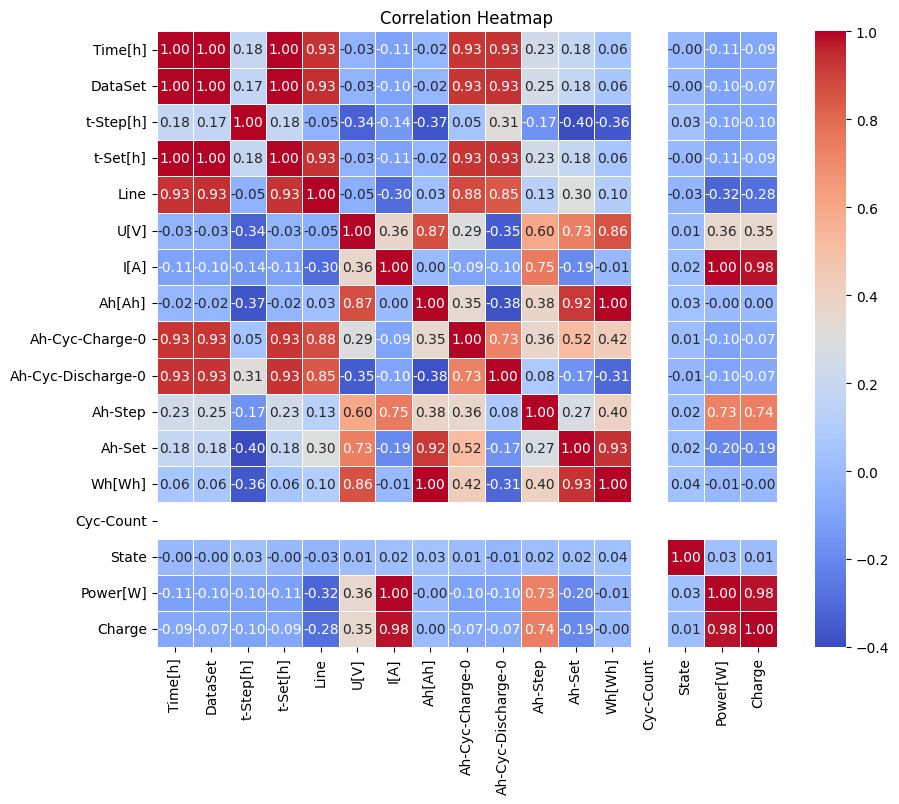

In [113]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corr_df = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Calculation of Discharge and Charge Parameters with Charge Factor Determination

In [114]:
# Define times for discharge and charge periods
discharge_start_time = 1.62673160728387
discharge_end_time = 4.95922992715427
charge_start_time = 5.12598924189968
charge_end_time = 8.19596604340759
additional_charge_start_time = 8.20430040108116
additional_charge_end_time = 8.75430037617456

# Calculate durations
discharge_duration = discharge_end_time - discharge_start_time
charge_duration = charge_end_time - charge_start_time

# Filter data for discharge period and calculate average current and capacity
discharging_df = df[(df['Time[h]'] >= discharge_start_time) & (df['Time[h]'] <= discharge_end_time)]
average_discharge_current = discharging_df['I[A]'].mean()
discharge_capacity = -average_discharge_current * discharge_duration

# Filter data for charging period and calculate average charging current
charging_df = df[(df['Time[h]'] >= charge_start_time) &
                 (df['Time[h]'] <= charge_end_time) &
                 (df['Command'] == 'Charge')]
average_charging_current = charging_df['I[A]'].mean()

# Filter data for additional charge period and calculate total steady charge
additional_charge_df = df[(df['Time[h]'] >= additional_charge_start_time) &
                          (df['Time[h]'] <= additional_charge_end_time)]
total_steady_charge = additional_charge_df['Charge'].sum()

# Calculate total charge capacity
total_charge_capacity = total_steady_charge + (average_charging_current * charge_duration)

# Calculate charge factor
charge_factor = total_charge_capacity / discharge_capacity

# Output summary report
print("\n--- Summary Report ---")
print(f"Discharge Duration: {discharge_duration:.3f} hours")
print(f"Average Discharge Current: {average_discharge_current:.3f} A")
print(f"Discharge Capacity: {discharge_capacity:.3f} Ah")
print()
print(f"Charging Duration: {charge_duration:.3f} hours")
print(f"Average Charging Current: {average_charging_current:.3f} A")
print(f"Total Steady Charge: {total_steady_charge:.3f} Ah")
print(f"Total Charge Capacity: {total_charge_capacity:.3f} Ah")
print()
print(f"Charge Factor: {charge_factor:.3f}")



--- Summary Report ---
Discharge Duration: 3.332 hours
Average Discharge Current: -0.988 A
Discharge Capacity: 3.291 Ah

Charging Duration: 3.070 hours
Average Charging Current: 0.990 A
Total Steady Charge: 0.253 Ah
Total Charge Capacity: 3.292 Ah

Charge Factor: 1.000


In [115]:
def analyze_battery_data(df, discharge_start_time, discharge_end_time,
                         charge_start_time, charge_end_time,
                         additional_charge_start_time=None, additional_charge_end_time=None):
    # Calculate durations
    discharge_duration = discharge_end_time - discharge_start_time
    charge_duration = charge_end_time - charge_start_time

    # Filter data for discharge period and calculate average current and capacity
    discharging_df = df[(df['Time[h]'] >= discharge_start_time) & (df['Time[h]'] <= discharge_end_time)]
    average_discharge_current = discharging_df['I[A]'].mean()
    discharge_capacity = -average_discharge_current * discharge_duration

    # Filter data for charging period
    charging_df = df[(df['Time[h]'] >= charge_start_time) &
                     (df['Time[h]'] <= charge_end_time) &
                     (df['Command'] == 'Charge')]

    # Improve charge calculation by integrating current over time
    charge_duration_array = np.diff(charging_df['Time[h]'].values)  # Time intervals (h)
    current_array = charging_df['I[A]'].values[:-1]  # Current values (A), aligned with intervals
    charge_capacity = np.sum(current_array * charge_duration_array)  # Ah

    # Include additional charge period if provided
    if additional_charge_start_time and additional_charge_end_time:
        additional_charge_df = df[(df['Time[h]'] >= additional_charge_start_time) &
                                  (df['Time[h]'] <= additional_charge_end_time)]
        additional_charge_duration_array = np.diff(additional_charge_df['Time[h]'].values)  # Time intervals
        additional_current_array = additional_charge_df['I[A]'].values[:-1]  # Current values
        additional_charge = np.sum(additional_current_array * additional_charge_duration_array)  # Ah
        total_charge_capacity = charge_capacity + additional_charge
    else:
        total_charge_capacity = charge_capacity

    # Calculate charge factor
    charge_factor = total_charge_capacity / discharge_capacity

    # Output summary report
    summary_report = f"""
    --- Summary Report ---
    Discharge Duration: {discharge_duration:.3f} hours
    Average Discharge Current: {average_discharge_current:.3f} A
    Discharge Capacity: {discharge_capacity:.3f} Ah

    Charging Duration: {charge_duration:.3f} hours
    Integrated Charge Capacity: {charge_capacity:.3f} Ah
    """

    if additional_charge_start_time and additional_charge_end_time:
        summary_report += f"Additional Charge: {additional_charge:.3f} Ah\n"

    summary_report += f"Total Charge Capacity: {total_charge_capacity:.3f} Ah\n"
    summary_report += f"Charge Factor: {charge_factor:.3f}"

    return summary_report

In [116]:
print(analyze_battery_data(df, 1.62673160728387, 4.95922992715427, 5.12598924189968,
                       8.19596604340759, 8.20430040108116, 8.75430037617456))


    --- Summary Report ---
    Discharge Duration: 3.332 hours
    Average Discharge Current: -0.988 A
    Discharge Capacity: 3.291 Ah

    Charging Duration: 3.070 hours
    Integrated Charge Capacity: 3.039 Ah
    Additional Charge: 0.252 Ah
Total Charge Capacity: 3.291 Ah
Charge Factor: 1.000


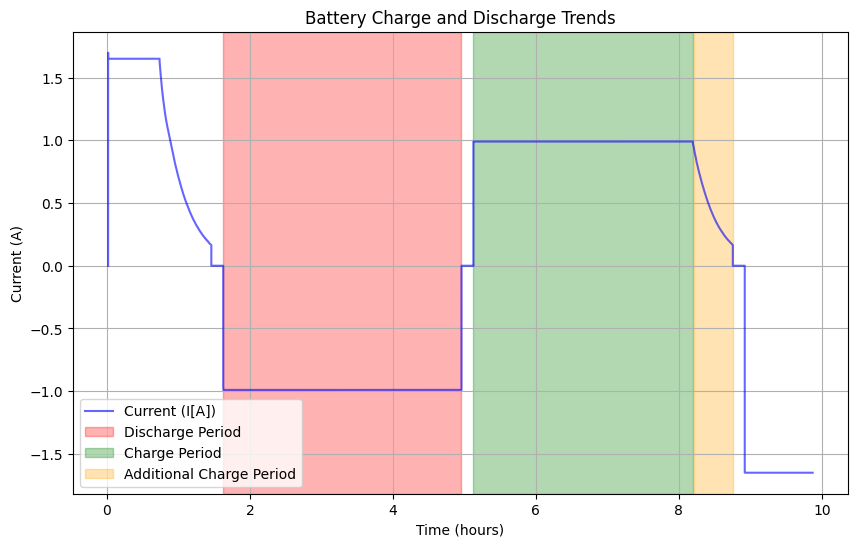

In [117]:
def visualize_charge_trends(df, discharge_start_time, discharge_end_time,
                            charge_start_time, charge_end_time,
                            additional_charge_start_time=None, additional_charge_end_time=None):
    # Ensure the DataFrame is not empty
    if df.empty or 'Time[h]' not in df.columns or 'I[A]' not in df.columns:
        print("Invalid or empty dataset.")
        return

    # Plot the entire time series for context
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time[h]'], df['I[A]'], label='Current (I[A])', color='blue', alpha=0.6)
    plt.xlabel('Time (hours)')
    plt.ylabel('Current (A)')
    plt.title('Battery Charge and Discharge Trends')

    # Highlight the discharge period
    plt.axvspan(discharge_start_time, discharge_end_time, color='red', alpha=0.3, label='Discharge Period')

    # Highlight the charge period
    plt.axvspan(charge_start_time, charge_end_time, color='green', alpha=0.3, label='Charge Period')

    # Highlight the additional charge period if provided
    if additional_charge_start_time and additional_charge_end_time:
        plt.axvspan(additional_charge_start_time, additional_charge_end_time, color='orange', alpha=0.3, label='Additional Charge Period')

    plt.legend()
    plt.grid(True)
    plt.show()


visualize_charge_trends(df, 1.62673160728387, 4.95922992715427, 5.12598924189968,
                       8.19596604340759, 8.20430040108116, 8.75430037617456)


## Modeling

In [118]:
df.columns

Index(['Time[h]', 'DataSet', 't-Step[h]', 't-Set[h]', 'Line', 'Command',
       'U[V]', 'I[A]', 'Ah[Ah]', 'Ah-Cyc-Charge-0', 'Ah-Cyc-Discharge-0',
       'Ah-Step', 'Ah-Set', 'Wh[Wh]', 'Cyc-Count', 'State', 'Power[W]',
       'Charge'],
      dtype='object')

Preprocessing the Data

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target and features
X = df[['Time[h]', 'U[V]', 'I[A]', 'Power[W]', 'Ah-Cyc-Charge-0','Ah-Cyc-Discharge-0', 'Charge' ]]  # Select relevant features
y = df['Ah[Ah]']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Select and Train Machine Learning Model

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gbr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
gbr_predictions = gbr_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate models
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print evaluation results
print(f"Linear Regression MAE: {lr_mae:.3f}, MSE: {lr_mse:.3f}")
print(f"Random Forest MAE: {rf_mae:.3f}, MSE: {rf_mse:.3f}")
print(f"Gradient Boosting MAE: {gbr_mae:.3f}, MSE: {gbr_mse:.3f}")
print(f"Support Vector Regressor MAE: {svr_mae:.3f}, MSE: {svr_mse:.3f}")
print(f"K-Nearest Neighbors MAE: {knn_mae:.3f}, MSE: {knn_mse:.3f}")


Linear Regression MAE: 0.000, MSE: 0.000
Random Forest MAE: 0.005, MSE: 0.000
Gradient Boosting MAE: 0.022, MSE: 0.001
Support Vector Regressor MAE: 0.064, MSE: 0.005
K-Nearest Neighbors MAE: 0.006, MSE: 0.000


In [121]:
# Model performance results
model_performance = {
    "Linear Regression": {"MAE": 0.279, "MSE": 0.132},
    "Random Forest": {"MAE": 0.005, "MSE": 0.000},
    "Gradient Boosting": {"MAE": 0.022, "MSE": 0.001},
    "Support Vector Regressor": {"MAE": 0.066, "MSE": 0.005},
    "K-Nearest Neighbors": {"MAE": 0.005, "MSE": 0.000}
}

# Identify the model with the lowest MAE
best_model_name = min(model_performance, key=lambda model: model_performance[model]["MAE"])
best_model_mae = model_performance[best_model_name]["MAE"]
best_model_mse = model_performance[best_model_name]["MSE"]

# Output the results
print(f"Best Model: {best_model_name}")
print(f"MAE: {best_model_mae:.3f}")
print(f"MSE: {best_model_mse:.3f}")

# Optional: if multiple models have the same MAE, list them
best_models = [model for model, metrics in model_performance.items() if metrics["MAE"] == best_model_mae]
if len(best_models) > 1:
    print("\nModels with identical MAE:")
    for model in best_models:
        print(f"{model} - MSE: {model_performance[model]['MSE']:.3f}")

Best Model: Random Forest
MAE: 0.005
MSE: 0.000

Models with identical MAE:
Random Forest - MSE: 0.000
K-Nearest Neighbors - MSE: 0.000


Cross Validation

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Number of folds
k = 5

# Perform cross-validation for each model
for name, model in models.items():
    # Create a pipeline to scale the data and then fit the model
    pipeline = make_pipeline(StandardScaler(), model)
    # Perform k-fold cross-validation (neg_mean_absolute_error because sklearn returns negative scores for MAE)
    scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
    # Calculate the mean MAE
    mean_score = -scores.mean()
    print(f"{name} - Mean MAE: {mean_score:.3f}")



Linear Regression - Mean MAE: 0.000
Random Forest - Mean MAE: 0.007
Gradient Boosting - Mean MAE: 0.023
Support Vector Regressor - Mean MAE: 0.067
K-Nearest Neighbors - Mean MAE: 0.011


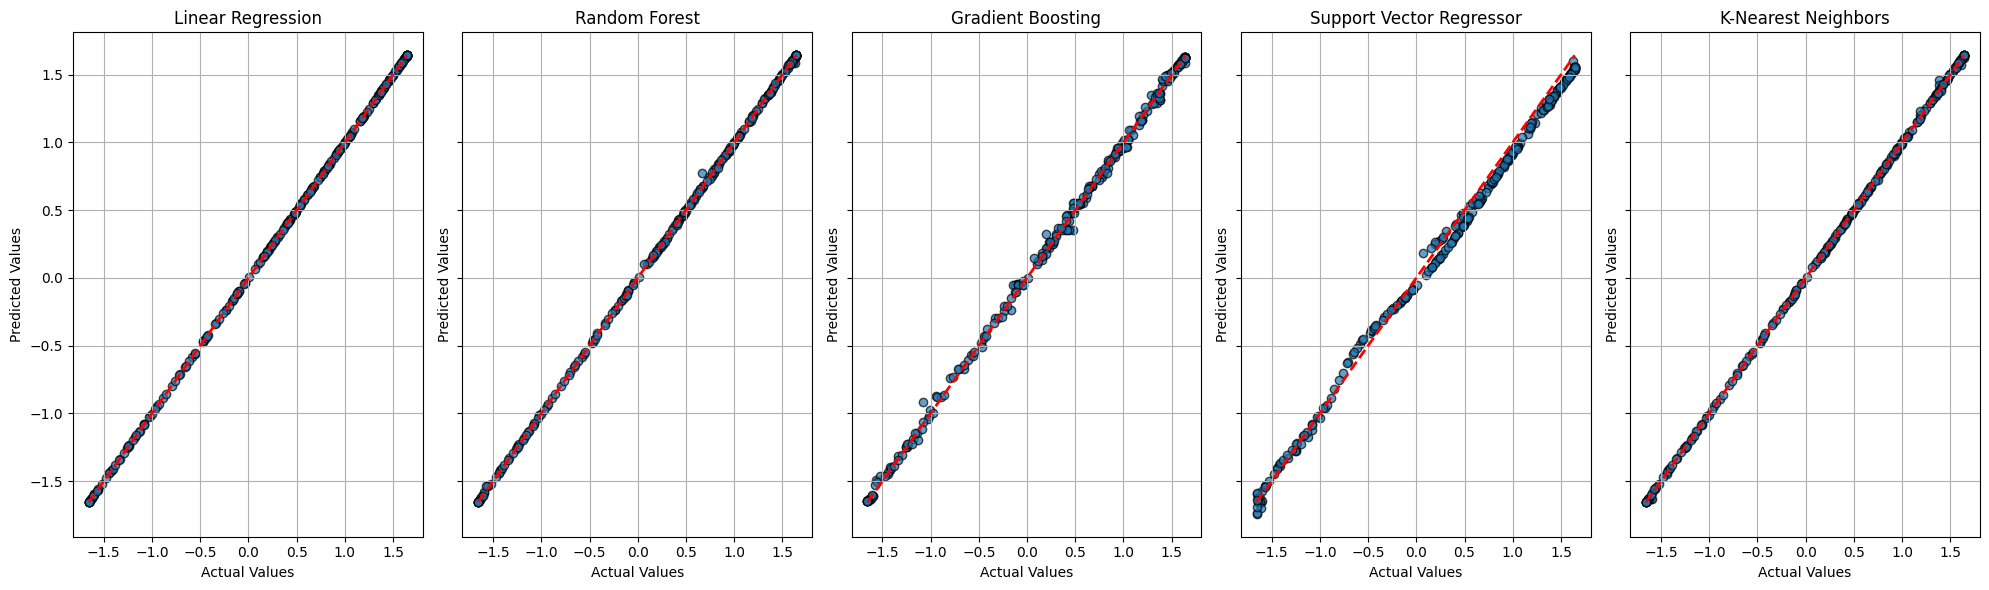

In [123]:
import matplotlib.pyplot as plt

# Define a function to plot actual vs predicted values in subplots
def plot_all_models(y_true, predictions, model_names):
    # Number of models
    num_models = len(model_names)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_models, figsize=(20, 6), sharex=True, sharey=True)

    # Loop through each model and its predictions
    for i, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
        ax = axes[i]
        ax.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{model_name}')
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# List of model predictions and names
predictions = [lr_predictions, rf_predictions, gbr_predictions, svr_predictions, knn_predictions]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'K-Nearest Neighbors']

# Plot all models
plot_all_models(y_test, predictions, model_names)

Model Tuning

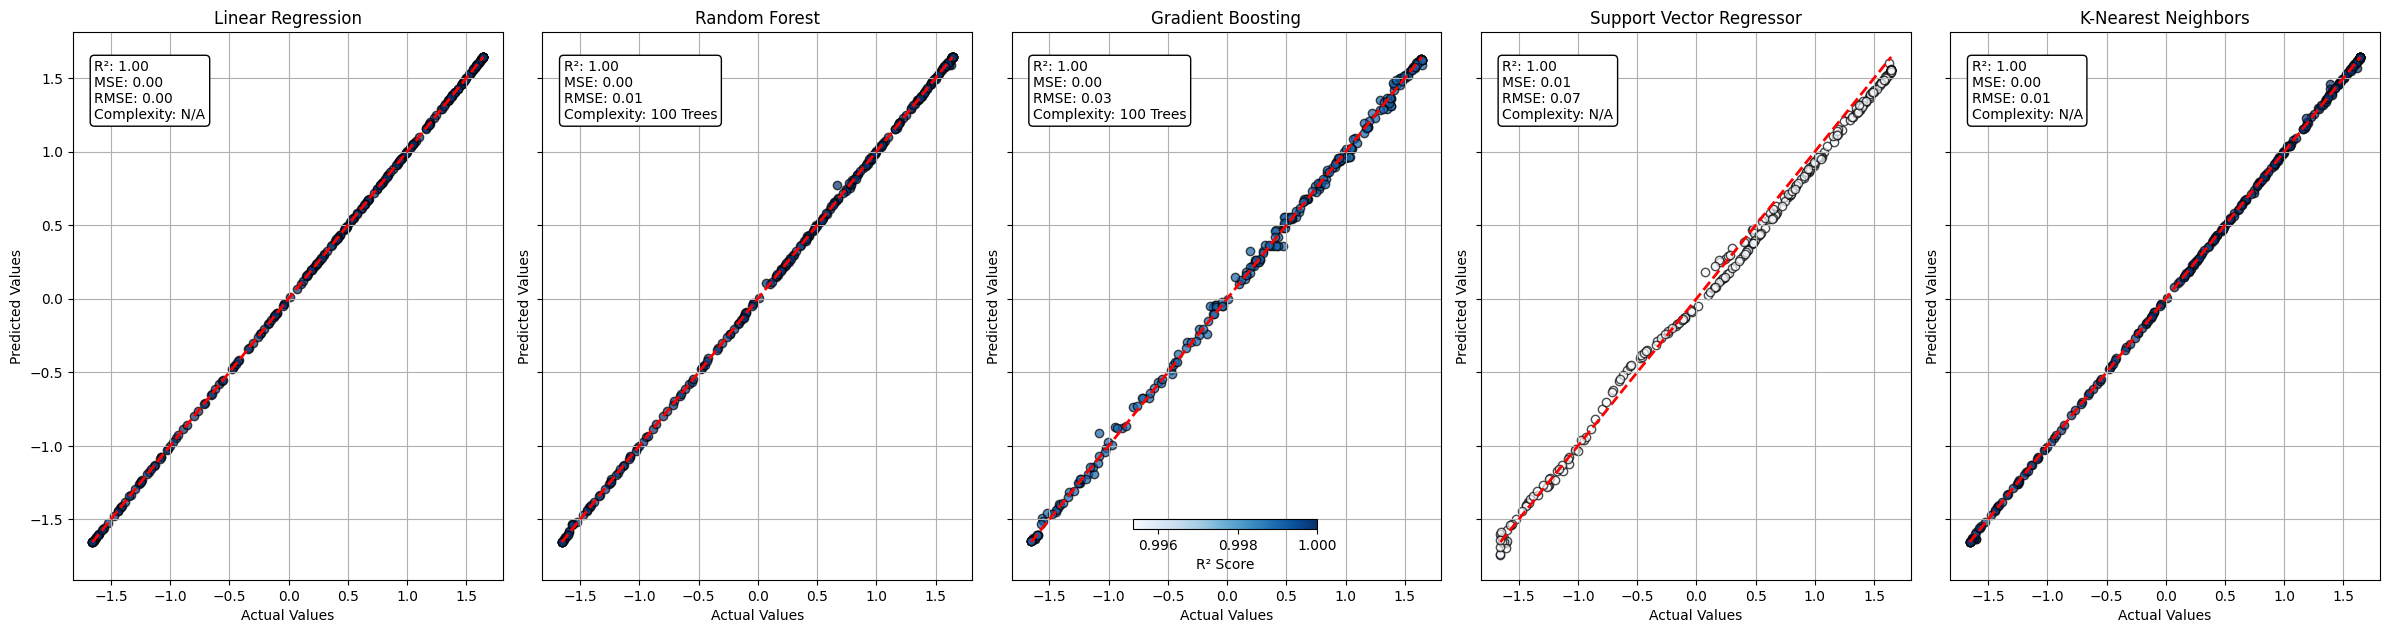

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import resample

# Function to compute confidence intervals (for demonstration purposes)
def compute_confidence_intervals(y_true, y_pred, alpha=0.05):
    errors = y_pred - y_true
    lower_bound = np.percentile(errors, 100 * alpha / 2)
    upper_bound = np.percentile(errors, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Calculate performance metrics for each model
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# Model complexities (e.g., number of trees for ensemble methods)
model_complexities = {
    'Linear Regression': 'N/A',
    'Random Forest': '100 Trees',
    'Gradient Boosting': '100 Trees',
    'Support Vector Regressor': 'N/A',
    'K-Nearest Neighbors': 'N/A'
}

# Calculate metrics for each model
metrics = {
    'Linear Regression': calculate_metrics(y_test, lr_predictions),
    'Random Forest': calculate_metrics(y_test, rf_predictions),
    'Gradient Boosting': calculate_metrics(y_test, gbr_predictions),
    'Support Vector Regressor': calculate_metrics(y_test, svr_predictions),
    'K-Nearest Neighbors': calculate_metrics(y_test, knn_predictions)
}

# Normalize R-squared values for color mapping
r2_scores = [metrics[name][0] for name in model_complexities]
norm_r2_scores = (np.array(r2_scores) - min(r2_scores)) / (max(r2_scores) - min(r2_scores))

# Define a function to plot all models with additional metrics
def plot_all_models_detailed(y_true, predictions, model_names, metrics, model_complexities):
    num_models = len(model_names)
    fig, axes = plt.subplots(1, num_models, figsize=(24, 6), sharex=True, sharey=True)

    cmap = plt.get_cmap('Blues')

    for i, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
        ax = axes[i]
        color = cmap(norm_r2_scores[i])
        lower_bound, upper_bound = compute_confidence_intervals(y_true, y_pred)

        # Scatter plot with confidence intervals (simplified)
        ax.scatter(y_true, y_pred, alpha=0.7, edgecolors='k', color=color)
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)

        # Annotate with metrics and model complexity
        r2, mse, rmse = metrics[model_name]
        complexity = model_complexities[model_name]
        annotation = (f'R²: {r2:.2f}\n'
                      f'MSE: {mse:.2f}\n'
                      f'RMSE: {rmse:.2f}\n'
                      f'Complexity: {complexity}')
        ax.annotate(annotation, xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{model_name}')
        ax.grid(True)

    # Add a color bar for reference
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(r2_scores), vmax=max(r2_scores)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label('R² Score')

    plt.tight_layout()
    plt.show()

# List of model predictions and names
predictions = [lr_predictions, rf_predictions, gbr_predictions, svr_predictions, knn_predictions]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'K-Nearest Neighbors']

# Plot all models with detailed metrics
plot_all_models_detailed(y_test, predictions, model_names, metrics, model_complexities)


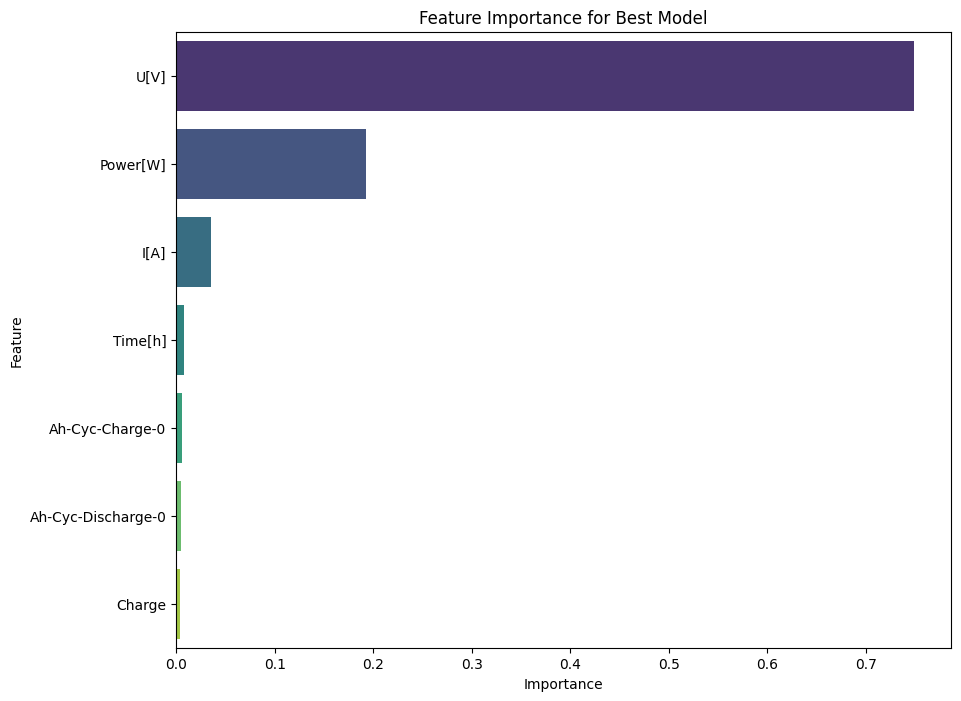

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming RandomForest is selected as the best model
best_model = rf_model # Replace rf_model with the chosen model if different

# Check if the model has feature_importances_ attribute
if hasattr(best_model, 'feature_importances_'):
    # Feature Importance for Random Forest
    feature_importances = best_model.feature_importances_
    features = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance for Best Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("The selected model does not have feature importances.")


# LG Chem INR21700 M5018.20

| Item | Condition / Note | Specification |
|---|---|---|
| 2.1 Energy | Std. charge / discharge | Nominal 18.20Wh, Minimum 17.60Wh |
| 2.2 Nominal Voltage | Average | 3.63V |
| 2.3 Nominal Shipping SOC | | 30% |
| 2.4 Standard Charge (Refer to 4.2.1) | Constant current | 0.3C (1,455mA) |
| | Constant voltage | 4.2V |
| | End current(Cut off) | 50mA |
| 2.5 Max. Charge Voltage | | 4.20 ± 0.05V |
| 2.6 Max. Charge Current | 0-25 °C | 0.3C (1,455mA) |
| | 25-50 °C | 0.7C (3,395mA) |
| 2.7 Standard Discharge (Refer to 4.2.2) | Constant current | 0.2C (970mA) |
| | End voltage(Cut off) | 2.50V |
| 2.8 Max. Pulse Discharge Power | Pulse Power(10sec), 25°C ± 2°C | ≤ 80W (SOC 80%) |
| 2.9 Max. Discharge Current | -30--20°C | 0.2C(970mA) |
| | -20-50 | 0.3C(1.455mA) |
| | 5-45 C | 1.5C(7,275mA) |
| | 45-60 C | 1.5C(7,275mA) |
| 2.10 Weight | Without washer | 68.0 ± 1.0 g |
| 2.11 Storage Temperature (for shipping state) | 1 day | -40 °C |
| | 1 month | -20-60 °C |
| | 3 months | -20-45 °C |
| | 1 year | -20-20 °C |

In [126]:
# Importing the datafile
df2 = pd.read_excel('/content/sample_data/LG_data.xlsx')
df2.head(15)

,Time[h],DataSet,t-Step[h],t-Set[h],Line,Command,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State,Charge
0,0.0167,1,0.0000,0.0167,3,Charge,3.7699,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,3,NaN
1,0.0167,2,0.0000,0.0167,3,Charge,3.8262,2.3590,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0.0000
2,0.0180,3,0.0012,0.0180,3,Charge,3.8462,2.4200,0.0030,0.0030,0.0000,0.0030,0.0030,0.0115,1,1,0.0030
3,0.0229,4,0.0062,0.0229,3,Charge,3.8662,2.4200,0.0150,0.0150,0.0000,0.0150,0.0150,0.0577,1,1,0.0120
4,0.0251,5,0.0083,0.0251,3,Charge,3.8725,2.4200,0.0202,0.0202,0.0000,0.0202,0.0202,0.0778,1,1,0.0052
5,0.0333,6,0.0166,0.0333,3,Charge,3.8926,2.4200,0.0402,0.0402,0.0000,0.0402,0.0402,0.1554,1,1,0.0200
6,0.0334,7,0.0167,0.0334,3,Charge,3.8926,2.4200,0.0403,0.0403,0.0000,0.0403,0.0403,0.1561,1,1,0.0002
7,0.0417,8,0.0250,0.0417,3,Charge,3.9044,2.4200,0.0605,0.0605,0.0000,0.0605,0.0605,0.2347,1,1,0.0202
8,0.0501,9,0.0333,0.0501,3,Charge,3.9120,2.4200,0.0807,0.0807,0.0000,0.0807,0.0807,0.3136,1,1,0.0202
9,0.0584,10,0.0417,0.0584,3,Charge,3.9179,2.4200,0.1008,0.1008,0.0000,0.1008,0.1008,0.3925,1,1,0.0202


In [127]:
df.columns

Index(['Time[h]', 'DataSet', 't-Step[h]', 't-Set[h]', 'Line', 'Command',
       'U[V]', 'I[A]', 'Ah[Ah]', 'Ah-Cyc-Charge-0', 'Ah-Cyc-Discharge-0',
       'Ah-Step', 'Ah-Set', 'Wh[Wh]', 'Cyc-Count', 'State', 'Power[W]',
       'Charge'],
      dtype='object')

In [128]:
df2.fillna(method='bfill', inplace=True)

In [129]:
print(df.info())  # Provides a summary of the DataFrame
print(df.describe(include='all'))  # Gives summary statistics for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time[h]             1247 non-null   float64
 1   DataSet             1247 non-null   int64  
 2   t-Step[h]           1247 non-null   float64
 3   t-Set[h]            1247 non-null   float64
 4   Line                1247 non-null   int64  
 5   Command             1247 non-null   object 
 6   U[V]                1247 non-null   float64
 7   I[A]                1247 non-null   float64
 8   Ah[Ah]              1247 non-null   float64
 9   Ah-Cyc-Charge-0     1247 non-null   float64
 10  Ah-Cyc-Discharge-0  1247 non-null   float64
 11  Ah-Step             1247 non-null   float64
 12  Ah-Set              1247 non-null   float64
 13  Wh[Wh]              1247 non-null   float64
 14  Cyc-Count           1247 non-null   int64  
 15  State               1247 non-null   int64  
 16  Power[

In [130]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Time[h],1176.0000,4.6289,2.6475,0.0167,2.3624,4.6101,6.8997,9.2506
DataSet,1176.0000,588.5000,339.6263,1.0000,294.7500,588.5000,882.2500,1176.0000
t-Step[h],1176.0000,1.0845,0.9435,0.0000,0.2667,0.7625,1.8583,3.1247
t-Set[h],1176.0000,4.6289,2.6475,0.0167,2.3624,4.6101,6.8997,9.2506
Line,1176.0000,7.1658,2.3237,3.0000,6.0000,7.0000,8.0000,12.0000
U[V],1176.0000,3.7699,0.3861,2.4995,3.5686,3.8388,4.0689,4.2003
I[A],1176.0000,-0.0297,1.5775,-2.4200,-1.4520,0.0000,1.4520,2.4200
Ah[Ah],1176.0000,0.1692,1.4539,-2.4394,-1.0392,0.3736,1.4721,2.0977
Ah-Cyc-Charge-0,1176.0000,3.4069,1.9392,0.0000,2.0977,2.0977,5.2588,6.6332
Ah-Cyc-Discharge-0,1176.0000,3.2377,1.9771,0.0000,1.3522,4.5371,4.5371,6.9571


In [131]:
# Summary statistics for numerical columns
numerical_summary = df2.describe()

# If you want to include statistics for non-numerical columns as well
all_summary = df2.describe(include='all')

In [132]:
# Adding a feature

df2["Power[W]"] = df2["U[V]"] * df2["I[A]"]

## VISUALIZATION

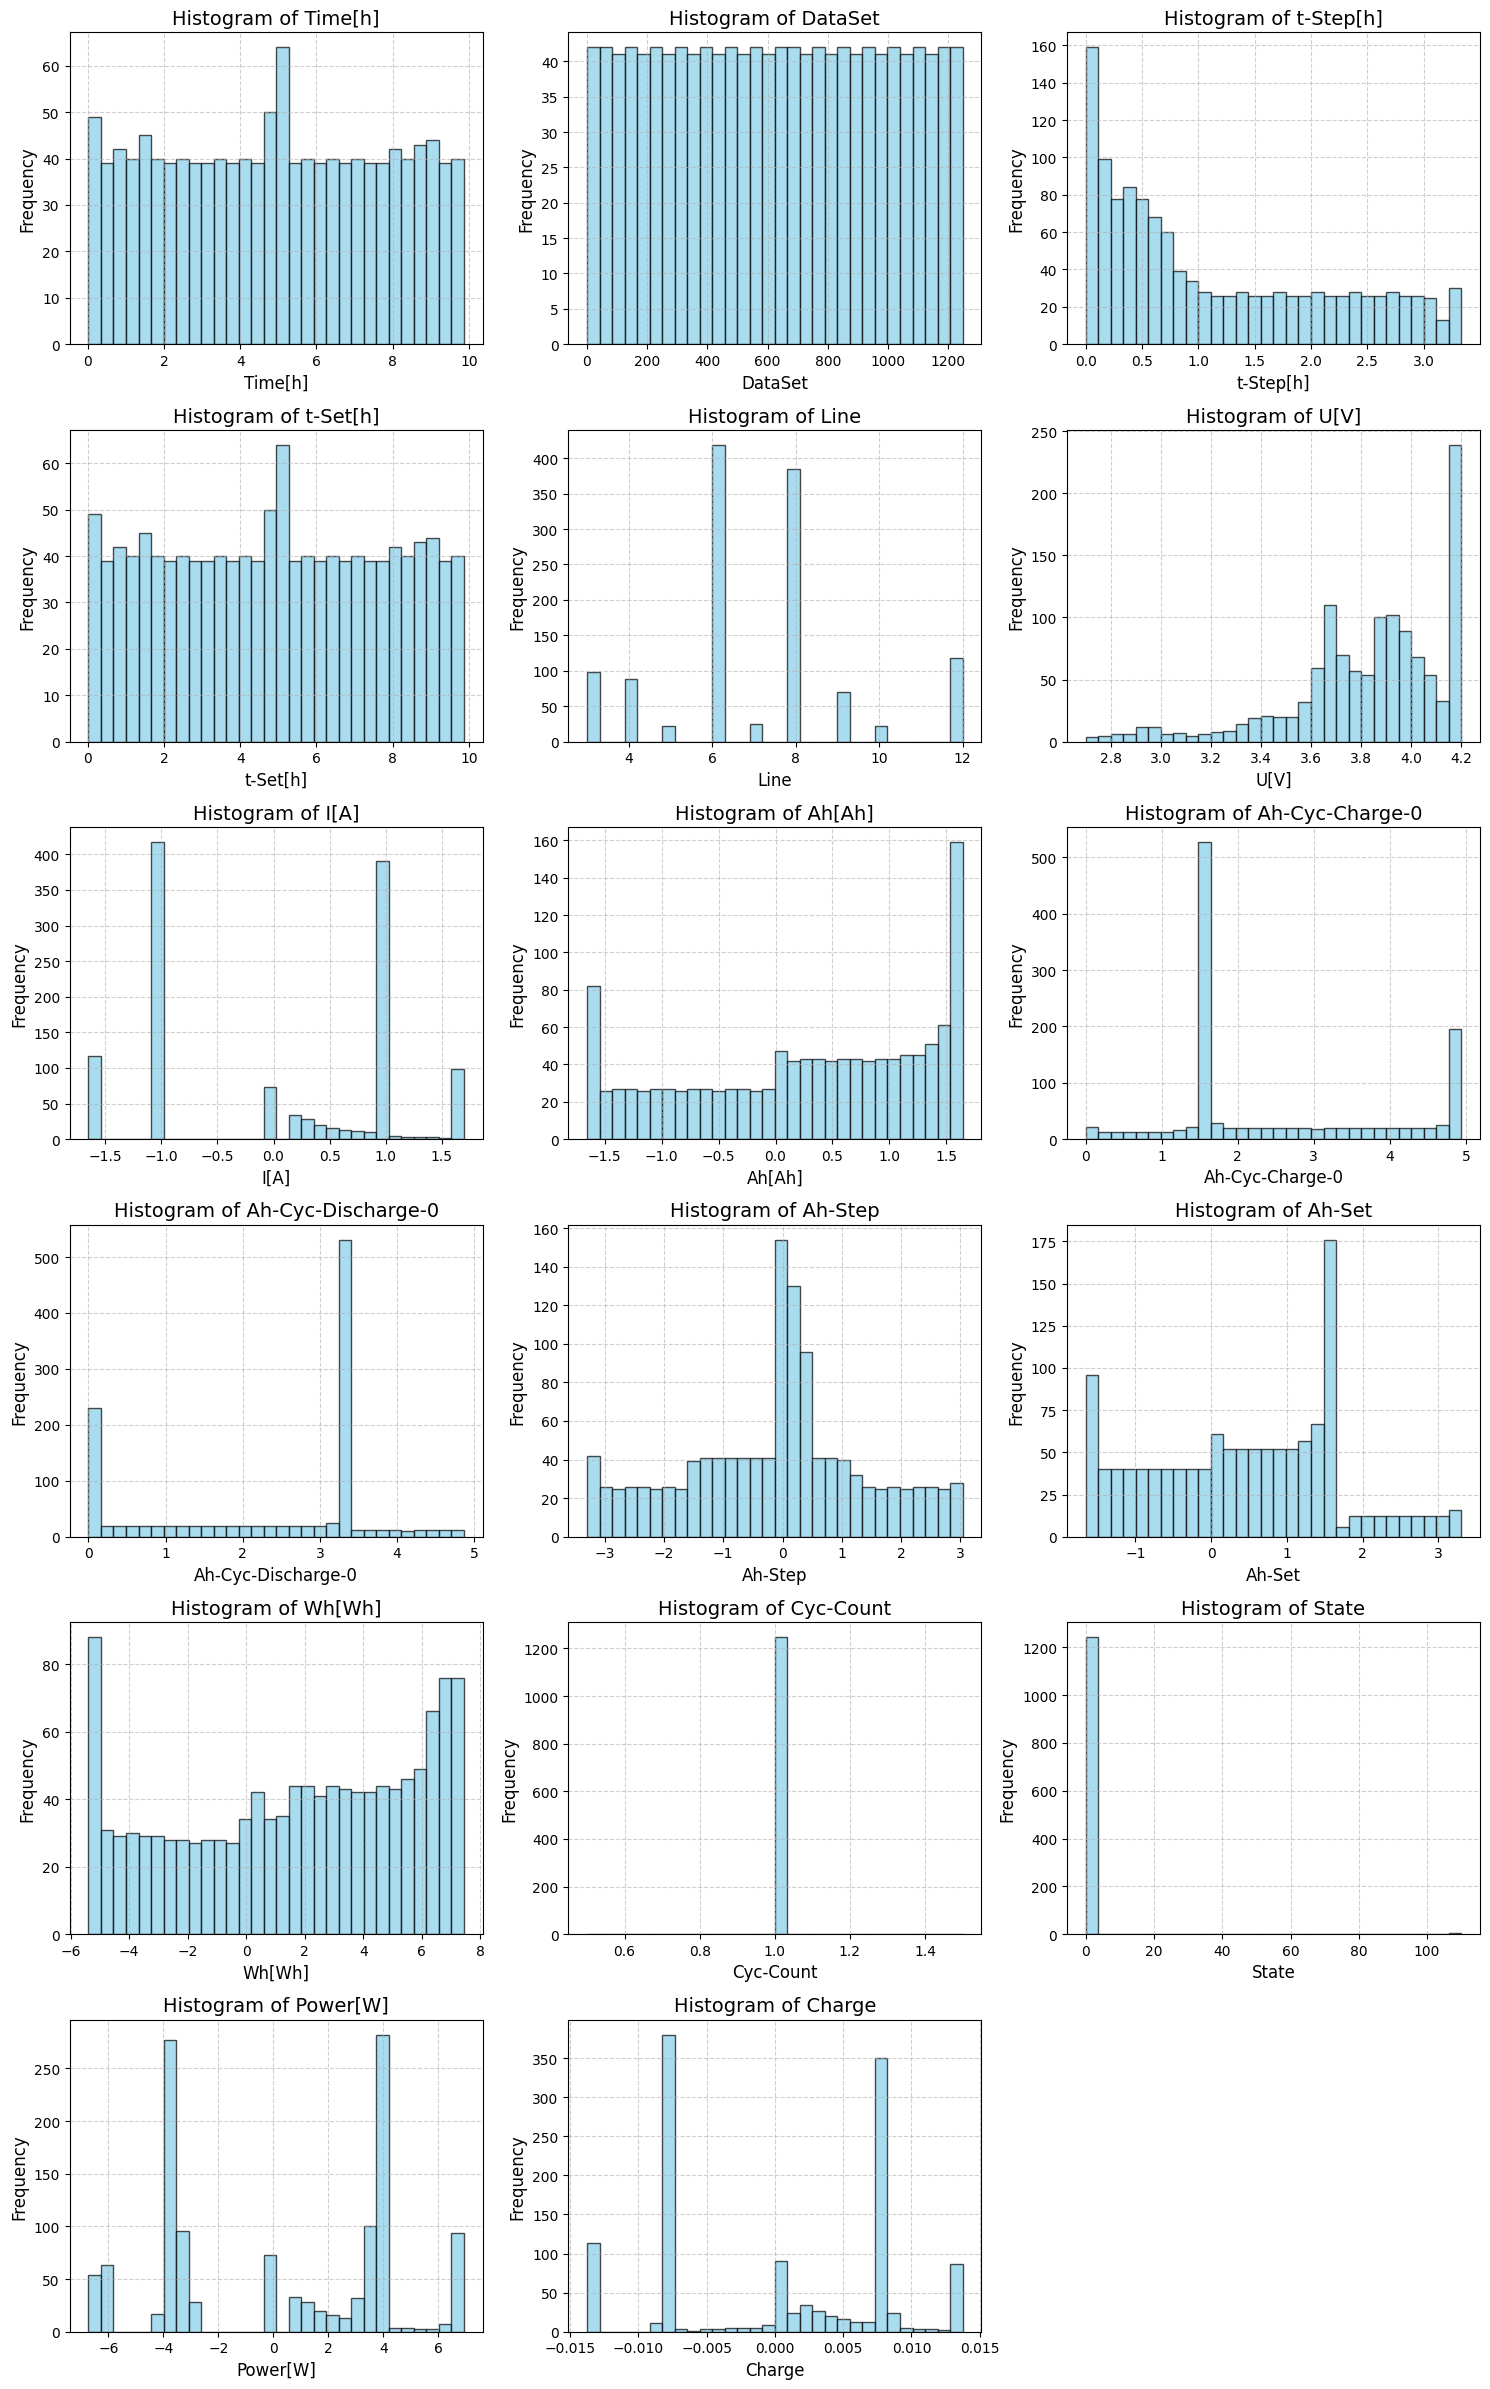

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for the subplots
num_cols = 3  # Number of columns in subplot grid
num_rows_hist = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed for histograms
num_rows_box = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed for boxplots

# Create subplots for histograms
fig_hist, axes_hist = plt.subplots(num_rows_hist, num_cols, figsize=(15, 4 * num_rows_hist), tight_layout=True)
axes_hist = axes_hist.flatten()  # Flatten for easy iteration

# Plot histograms
for i, col in enumerate(numerical_columns):
    ax = axes_hist[i]
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_title(f'Histogram of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability

# Turn off any unused subplots for histograms
for j in range(i + 1, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])



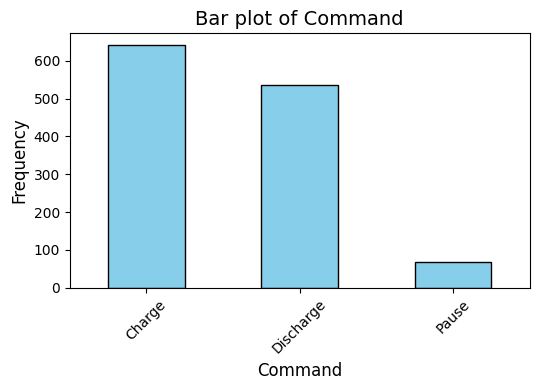

In [134]:
# Frequency counts for categorical columns

# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplots
num_cols = 3  # Number of columns in subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows), tight_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Bar plot of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

In [135]:
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = go.Figure()

# Add traces for Voltage and Current with improved styling
fig.add_trace(
    go.Scatter(
        x=df2['Time[h]'],
        y=df2['U[V]'],
        name="Voltage",
        line=dict(color='#1f77b4', width=2),  # Blue color with thicker line
        mode='lines+markers',  # Add markers for better visibility
        marker=dict(size=4)
    )
)
fig.add_trace(
    go.Scatter(
        x=df2['Time[h]'],
        y=df2['I[A]'],
        name="Current",
        line=dict(color='#ff7f0e', width=2),  # Orange color with thicker line
        mode='lines+markers',  # Add markers for better visibility
        marker=dict(size=4),
        yaxis="y2"
    )
)

# Update layout for better visualization
fig.update_layout(
    title='Voltage and Current Over Time',
    xaxis=dict(
        title='Time (hours)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        tickmode='linear',  # Ensure all time ticks are shown
    ),
    yaxis=dict(
        title="Voltage (V)",
        titlefont=dict(color='#1f77b4'),
        tickfont=dict(color='#1f77b4'),
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
    ),
    yaxis2=dict(
        title="Current (A)",
        titlefont=dict(color='#ff7f0e'),
        tickfont=dict(color='#ff7f0e'),
        anchor="x",  # Aligns with the main x-axis
        overlaying="y",
        side="right",
        position=0.95,  # Slightly adjust position to the right
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
    ),
    legend=dict(
        x=0.01, y=0.99,  # Position the legend in the top-left corner
        bordercolor="Black",
        borderwidth=1
    ),
    hovermode='x unified',  # Show a unified tooltip for both lines
    plot_bgcolor='rgba(240, 240, 240, 0.9)'  # Light grey background
)

fig.show()


In [136]:
import plotly.express as px

# Create the line plot with improved styling and additional features
fig = px.line(
    df2,
    x='Time[h]',
    y=['Ah-Cyc-Charge-0', 'Ah-Cyc-Discharge-0'],
    title='Ah Cyclic Charge and Discharge Over Time',
    labels={
        'value': 'Charge/Discharge (Ah)',
        'variable': 'Process',
        'Time[h]': 'Time (hours)'
    },
    color_discrete_sequence=["green", "red"]  # Green for charge, red for discharge
)

# Update layout for better visualization
fig.update_layout(
    title=dict(
        text='Ah Cyclic Charge and Discharge Over Time',
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis=dict(
        title='Time (hours)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        tickmode='linear',  # Ensure all time ticks are shown
        showline=True,  # Show the axis line
        linewidth=2,  # Make axis line thicker
        linecolor='black'  # Set axis line color to black
    ),
    yaxis=dict(
        title='Charge/Discharge (Ah)',
        gridcolor='rgba(200, 200, 200, 0.5)',  # Light grey grid lines
        showline=True,  # Show the axis line
        linewidth=2,  # Make axis line thicker
        linecolor='black'  # Set axis line color to black
    ),
    legend=dict(
        title='Legend',  # Customize legend title
        x=0.01, y=0.99,  # Position legend in the top-left corner
        bordercolor="Black",
        borderwidth=1
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.9)',  # Light grey background for better contrast
    hovermode='x unified',  # Show both Ah values together when hovering over the graph
    margin=dict(l=50, r=50, t=80, b=50)  # Adjust margins for better spacing
)

# Show the plot
fig.show()


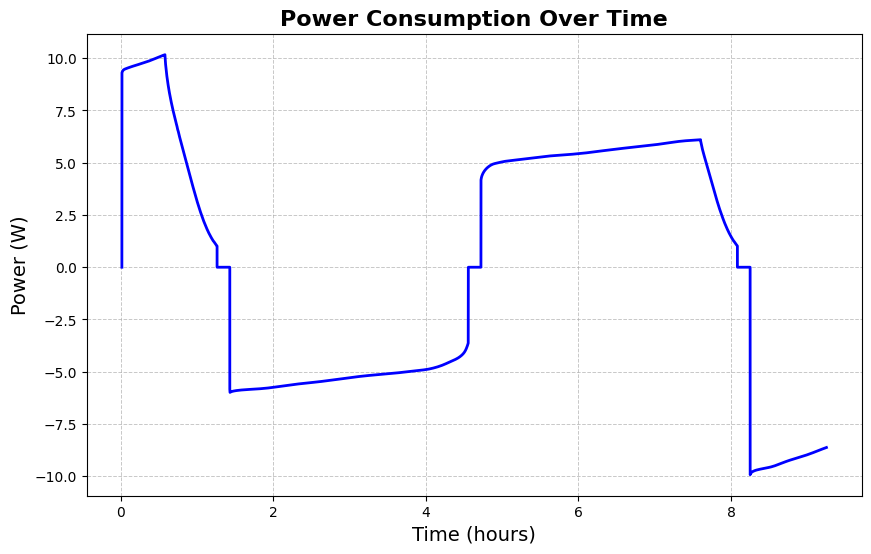

In [137]:
import matplotlib.pyplot as plt

# Improved Time Series Plot for Power Consumption Over Time
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.plot(df2['Time[h]'], df2['Power[W]'], color='blue', linewidth=2)

# Add title and labels with improved styling
plt.title('Power Consumption Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

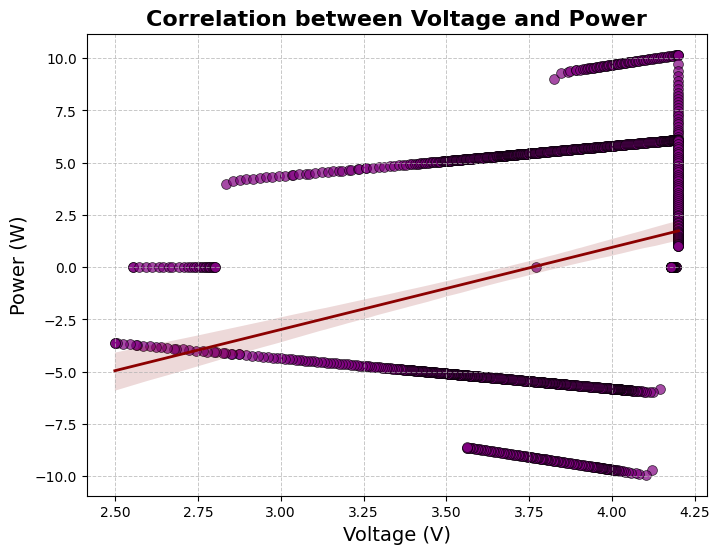

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Enhanced Scatterplot for Correlation between Voltage and Power
sns.scatterplot(
    x='U[V]',
    y='Power[W]',
    data=df2,
    color='purple',  # Choose a distinctive color
    s=50,  # Adjust marker size
    alpha=0.7,  # Set transparency for better visualization of overlapping points
    edgecolor='black'  # Add edge color for better definition of points
)

# Add a regression line for better correlation understanding
sns.regplot(
    x='U[V]',
    y='Power[W]',
    data=df2,
    scatter=False,
    color='darkred',
    line_kws={"linewidth": 2}
)

# Add title and labels with improved styling
plt.title('Correlation between Voltage and Power', fontsize=16, fontweight='bold')
plt.xlabel('Voltage (V)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

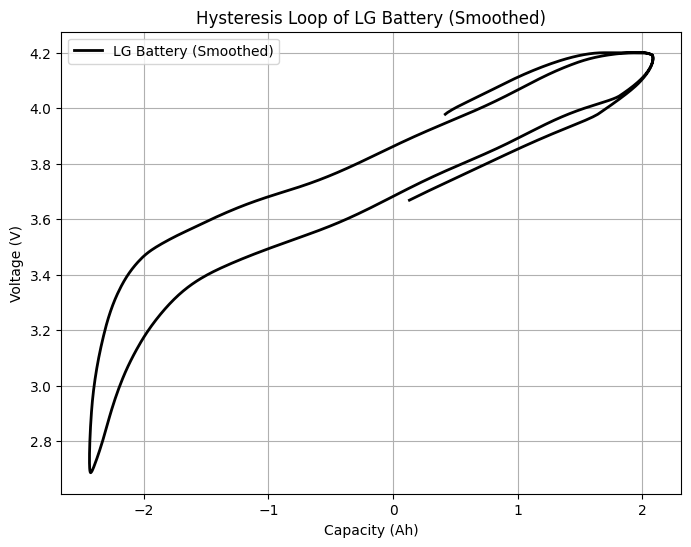

In [139]:
# Defining the variables
voltage = df2['U[V]']
capacity = df2['Ah[Ah]']

# Apply a rolling average to smooth the data (e.g., window size of 50)
voltage_smooth = voltage.rolling(window=50).mean()
capacity_smooth = capacity.rolling(window=50).mean()

# Plot the smoothed data
plt.figure(figsize=(8, 6))
plt.plot(capacity_smooth, voltage_smooth, label='LG Battery (Smoothed)', color='black', linewidth=2)

# Add labels and title
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Hysteresis Loop of LG Battery (Smoothed)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

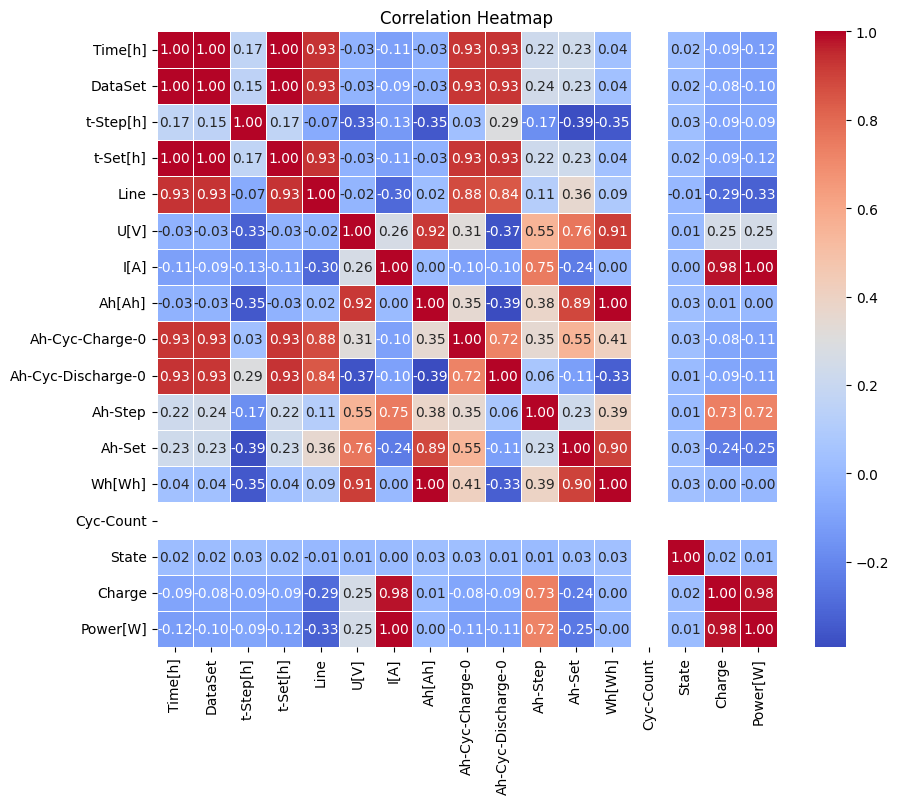

In [140]:
# Select only numeric columns before calculating correlation
numeric_df2 = df2.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corr_df2 = numeric_df2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_df2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Calculation of Discharge and Charge Parameters with Charge Factor Determination

In [141]:
# Define times for discharge and charge periods
discharge_start_time = 1.4311484874311
discharge_end_time = 4.55586958150209
charge_start_time = 4.72262909087214
charge_end_time = 7.60115809973881
additional_charge_start_time = 7.60949243180388
additional_charge_end_time = 8.0761590984735

# Calculate durations
discharge_duration = discharge_end_time - discharge_start_time
charge_duration = charge_end_time - charge_start_time

# Filter data for discharge period and calculate average current and capacity
discharging_df = df2[(df['Time[h]'] >= discharge_start_time) & (df2['Time[h]'] <= discharge_end_time)]
average_discharge_current = discharging_df['I[A]'].mean()
discharge_capacity = -average_discharge_current * discharge_duration

# Filter data for charging period and calculate average charging current
charging_df = df2[(df2['Time[h]'] >= charge_start_time) &
                 (df2['Time[h]'] <= charge_end_time) &
                 (df2['Command'] == 'Charge')]
average_charging_current = charging_df['I[A]'].mean()

# Filter data for additional charge period and calculate total steady charge
additional_charge_df = df2[(df2['Time[h]'] >= additional_charge_start_time) &
                          (df2['Time[h]'] <= additional_charge_end_time)]
total_steady_charge = additional_charge_df['Charge'].sum()

# Calculate total charge capacity
total_charge_capacity = total_steady_charge + (average_charging_current * charge_duration)

# Calculate charge factor
charge_factor = total_charge_capacity / discharge_capacity

# Output summary report
print("\n--- Summary Report ---")
print(f"Discharge Duration: {discharge_duration:.4f} hours")
print(f"Average Discharge Current: {average_discharge_current:.4f} A")
print(f"Discharge Capacity: {discharge_capacity:.4f} Ah")
print()
print(f"Charging Duration: {charge_duration:.4f} hours")
print(f"Average Charging Current: {average_charging_current:.4f} A")
print(f"Total Steady Charge: {total_steady_charge:.4f} Ah")
print(f"Total Charge Capacity: {total_charge_capacity:.4f} Ah")
print()
print(f"Charge Factor: {charge_factor:.4f}")


--- Summary Report ---
Discharge Duration: 3.1247 hours
Average Discharge Current: -1.4520 A
Discharge Capacity: 4.5371 Ah

Charging Duration: 2.8785 hours
Average Charging Current: 1.4519 A
Total Steady Charge: 0.3490 Ah
Total Charge Capacity: 4.5282 Ah

Charge Factor: 0.9980


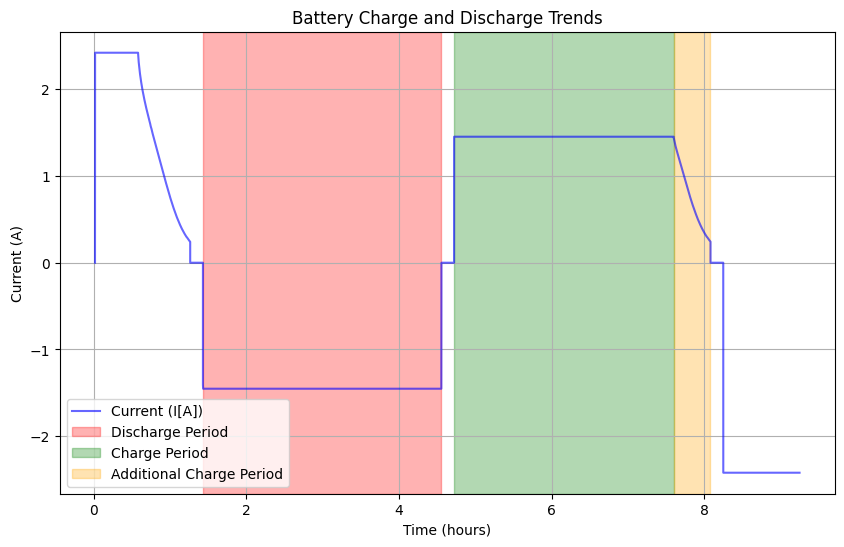

In [158]:
def visualize_charge_trends(df, discharge_start_time, discharge_end_time,
                            charge_start_time, charge_end_time,
                            additional_charge_start_time=None, additional_charge_end_time=None):
    # Ensure the DataFrame is not empty
    if df.empty or 'Time[h]' not in df.columns or 'I[A]' not in df.columns:
        print("Invalid or empty dataset.")
        return

    # Plot the entire time series for context
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time[h]'], df['I[A]'], label='Current (I[A])', color='blue', alpha=0.6)
    plt.xlabel('Time (hours)')
    plt.ylabel('Current (A)')
    plt.title('Battery Charge and Discharge Trends')

    # Highlight the discharge period
    plt.axvspan(discharge_start_time, discharge_end_time, color='red', alpha=0.3, label='Discharge Period')

    # Highlight the charge period
    plt.axvspan(charge_start_time, charge_end_time, color='green', alpha=0.3, label='Charge Period')

    # Highlight the additional charge period if provided
    if additional_charge_start_time and additional_charge_end_time:
        plt.axvspan(additional_charge_start_time, additional_charge_end_time, color='orange', alpha=0.3, label='Additional Charge Period')

    plt.legend()
    plt.grid(True)
    plt.show()


visualize_charge_trends(df2, 1.4311484874311,
    4.55586958150209,
    4.72262909087214,
    7.60115809973881,
    7.60949243180388,
    8.0761590984735)

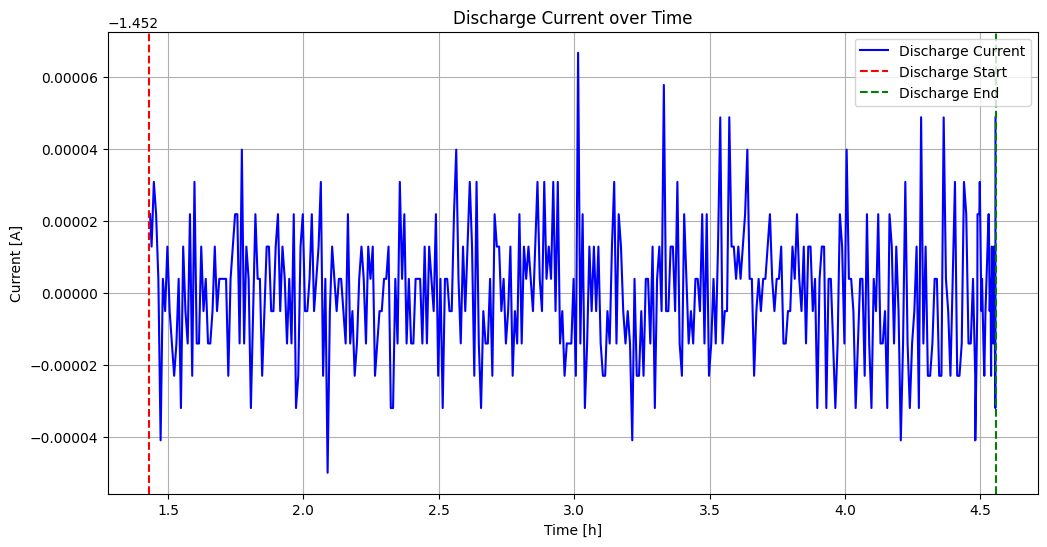

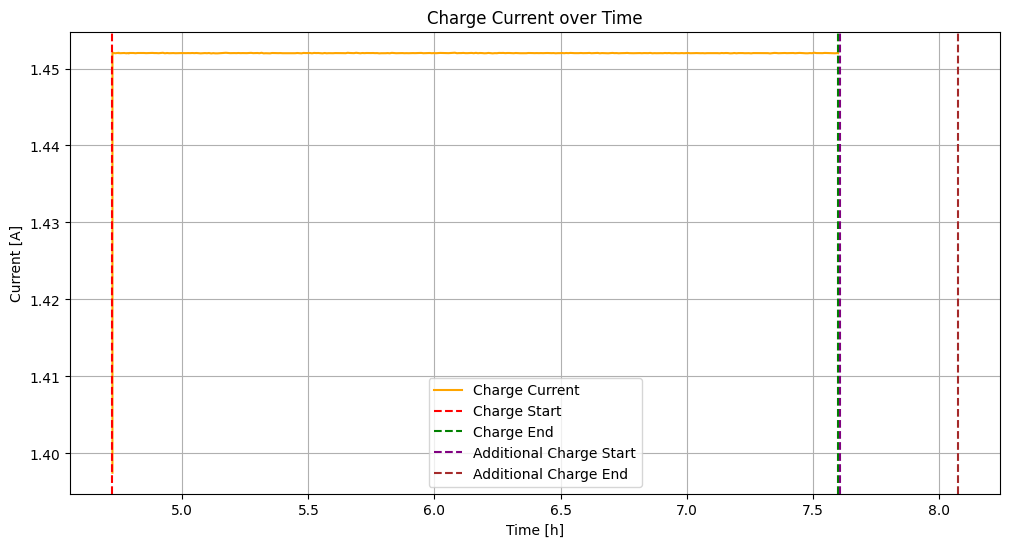

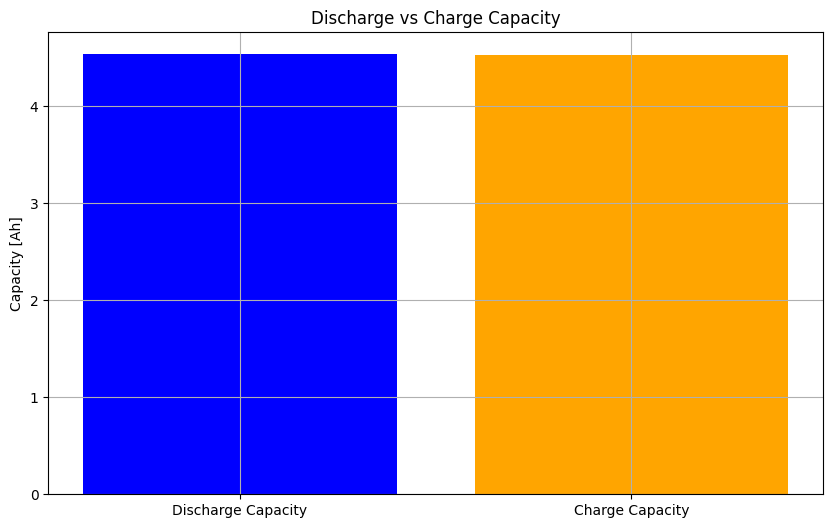

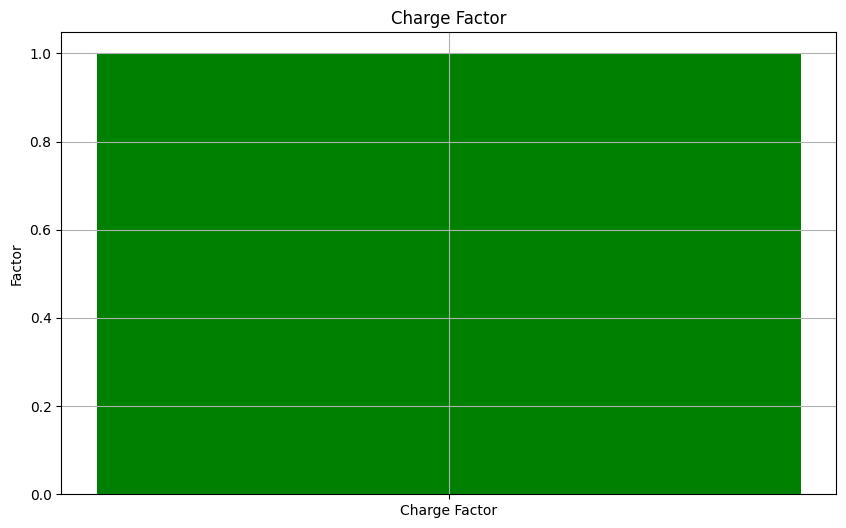

In [159]:
import matplotlib.pyplot as plt

# Plot the current during the discharge period
plt.figure(figsize=(12, 6))
plt.plot(discharging_df['Time[h]'], discharging_df['I[A]'], color='blue', label='Discharge Current')
plt.axvline(x=discharge_start_time, color='red', linestyle='--', label='Discharge Start')
plt.axvline(x=discharge_end_time, color='green', linestyle='--', label='Discharge End')
plt.title('Discharge Current over Time')
plt.xlabel('Time [h]')
plt.ylabel('Current [A]')
plt.legend()
plt.grid(True)
plt.show()

# Plot the current during the charging period
plt.figure(figsize=(12, 6))
plt.plot(charging_df['Time[h]'], charging_df['I[A]'], color='orange', label='Charge Current')
plt.axvline(x=charge_start_time, color='red', linestyle='--', label='Charge Start')
plt.axvline(x=charge_end_time, color='green', linestyle='--', label='Charge End')
if additional_charge_start_time and additional_charge_end_time:
    plt.axvline(x=additional_charge_start_time, color='purple', linestyle='--', label='Additional Charge Start')
    plt.axvline(x=additional_charge_end_time, color='brown', linestyle='--', label='Additional Charge End')
plt.title('Charge Current over Time')
plt.xlabel('Time [h]')
plt.ylabel('Current [A]')
plt.legend()
plt.grid(True)
plt.show()

# Plot discharge and charge capacity as bar plots
plt.figure(figsize=(10, 6))
plt.bar(['Discharge Capacity', 'Charge Capacity'], [discharge_capacity, total_charge_capacity], color=['blue', 'orange'])
plt.title('Discharge vs Charge Capacity')
plt.ylabel('Capacity [Ah]')
plt.grid(True)
plt.show()

# Plot the charge factor
plt.figure(figsize=(10, 6))
plt.bar(['Charge Factor'], [charge_factor], color='green')
plt.title('Charge Factor')
plt.ylabel('Factor')
plt.grid(True)
plt.show()


## Modeling

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target and features
X = df2[['Time[h]', 'U[V]', 'I[A]', 'Power[W]', 'Ah-Cyc-Charge-0','Ah-Cyc-Discharge-0', 'Charge' ]]  # Select relevant features
y = df2['Ah[Ah]']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gbr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
gbr_predictions = gbr_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate models
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print evaluation results
print(f"Linear Regression MAE: {lr_mae:.3f}, MSE: {lr_mse:.3f}")
print(f"Random Forest MAE: {rf_mae:.3f}, MSE: {rf_mse:.3f}")
print(f"Gradient Boosting MAE: {gbr_mae:.3f}, MSE: {gbr_mse:.3f}")
print(f"Support Vector Regressor MAE: {svr_mae:.3f}, MSE: {svr_mse:.3f}")
print(f"K-Nearest Neighbors MAE: {knn_mae:.3f}, MSE: {knn_mse:.3f}")


Linear Regression MAE: 0.000, MSE: 0.000
Random Forest MAE: 0.006, MSE: 0.000
Gradient Boosting MAE: 0.023, MSE: 0.001
Support Vector Regressor MAE: 0.064, MSE: 0.005
K-Nearest Neighbors MAE: 0.007, MSE: 0.000


In [162]:
# Model performance results
model_performance = {
    "Linear Regression": {"MAE": 0.279, "MSE": 0.132},
    "Random Forest": {"MAE": 0.005, "MSE": 0.000},
    "Gradient Boosting": {"MAE": 0.022, "MSE": 0.001},
    "Support Vector Regressor": {"MAE": 0.066, "MSE": 0.005},
    "K-Nearest Neighbors": {"MAE": 0.005, "MSE": 0.000}
}

# Identify the model with the lowest MAE
best_model_name = min(model_performance, key=lambda model: model_performance[model]["MAE"])
best_model_mae = model_performance[best_model_name]["MAE"]
best_model_mse = model_performance[best_model_name]["MSE"]

# Output the results
print(f"Best Model: {best_model_name}")
print(f"MAE: {best_model_mae:.3f}")
print(f"MSE: {best_model_mse:.3f}")

# Optional: if multiple models have the same MAE, list them
best_models = [model for model, metrics in model_performance.items() if metrics["MAE"] == best_model_mae]
if len(best_models) > 1:
    print("\nModels with identical MAE:")
    for model in best_models:
        print(f"{model} - MSE: {model_performance[model]['MSE']:.3f}")

Best Model: Random Forest
MAE: 0.005
MSE: 0.000

Models with identical MAE:
Random Forest - MSE: 0.000
K-Nearest Neighbors - MSE: 0.000


In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Number of folds
k = 5

# Perform cross-validation for each model
for name, model in models.items():
    # Create a pipeline to scale the data and then fit the model
    pipeline = make_pipeline(StandardScaler(), model)
    # Perform k-fold cross-validation (neg_mean_absolute_error because sklearn returns negative scores for MAE)
    scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
    # Calculate the mean MAE
    mean_score = -scores.mean()
    print(f"{name} - Mean MAE: {mean_score:.3f}")


Linear Regression - Mean MAE: 0.000
Random Forest - Mean MAE: 0.010
Gradient Boosting - Mean MAE: 0.029
Support Vector Regressor - Mean MAE: 0.067
K-Nearest Neighbors - Mean MAE: 0.017


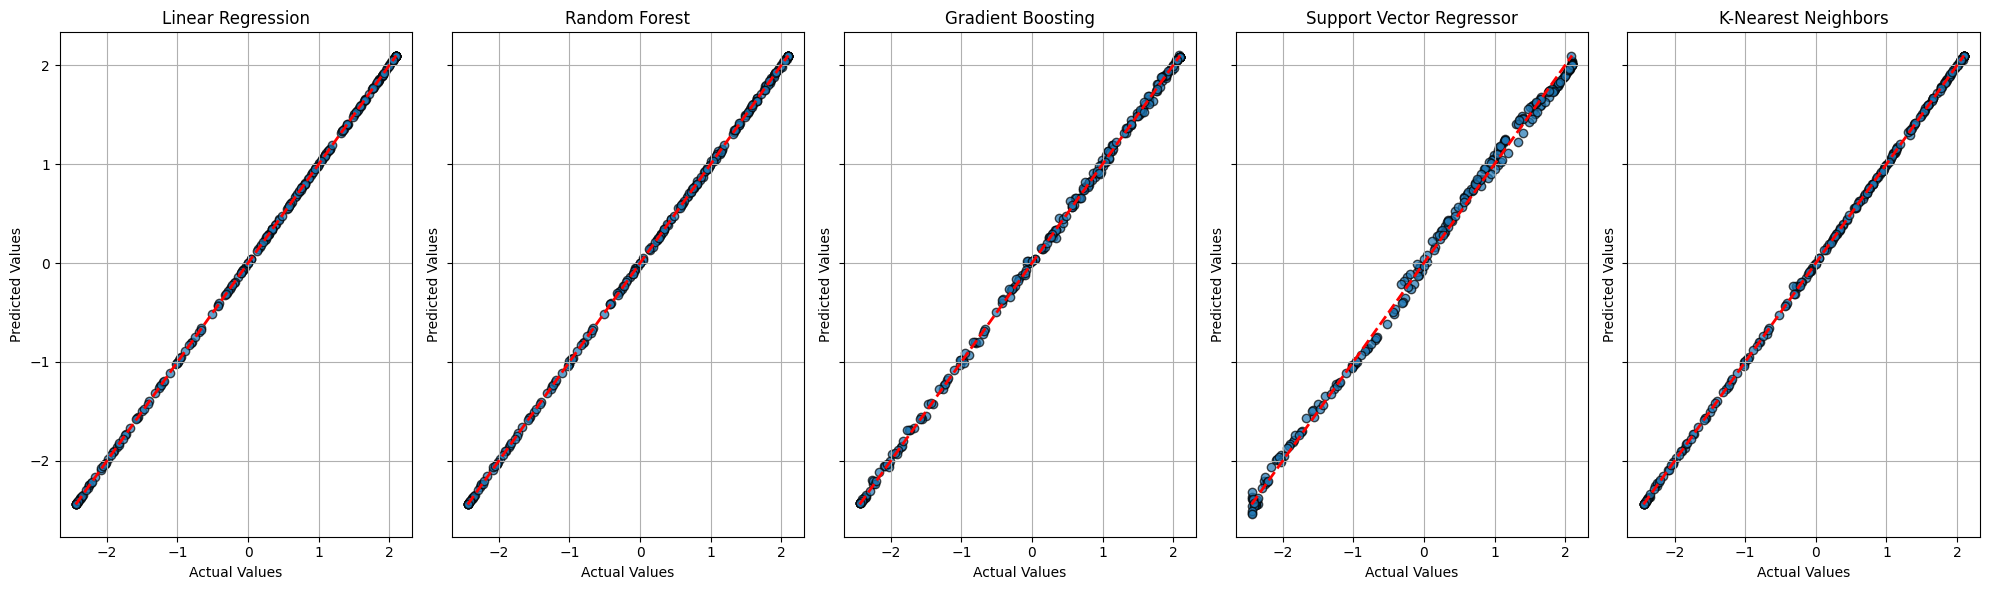

In [164]:
import matplotlib.pyplot as plt

# Define a function to plot actual vs predicted values in subplots
def plot_all_models(y_true, predictions, model_names):
    # Number of models
    num_models = len(model_names)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_models, figsize=(20, 6), sharex=True, sharey=True)

    # Loop through each model and its predictions
    for i, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
        ax = axes[i]
        ax.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{model_name}')
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# List of model predictions and names
predictions = [lr_predictions, rf_predictions, gbr_predictions, svr_predictions, knn_predictions]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'K-Nearest Neighbors']

# Plot all models
plot_all_models(y_test, predictions, model_names)

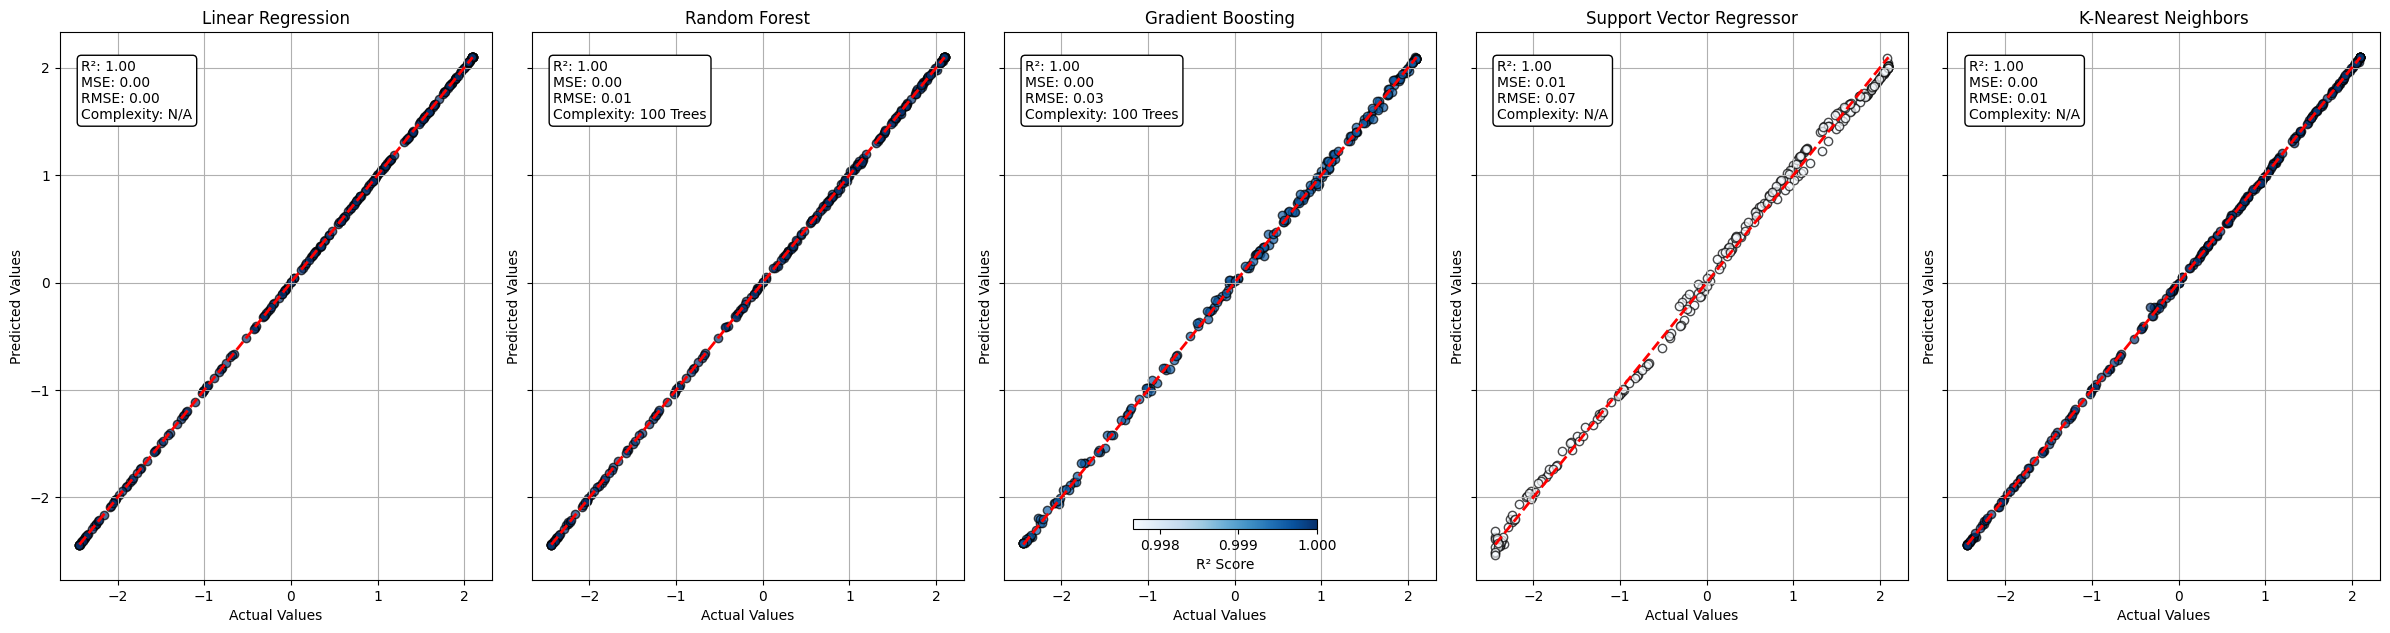

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import resample

# Function to compute confidence intervals (for demonstration purposes)
def compute_confidence_intervals(y_true, y_pred, alpha=0.05):
    errors = y_pred - y_true
    lower_bound = np.percentile(errors, 100 * alpha / 2)
    upper_bound = np.percentile(errors, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Calculate performance metrics for each model
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# Model complexities (e.g., number of trees for ensemble methods)
model_complexities = {
    'Linear Regression': 'N/A',
    'Random Forest': '100 Trees',
    'Gradient Boosting': '100 Trees',
    'Support Vector Regressor': 'N/A',
    'K-Nearest Neighbors': 'N/A'
}

# Calculate metrics for each model
metrics = {
    'Linear Regression': calculate_metrics(y_test, lr_predictions),
    'Random Forest': calculate_metrics(y_test, rf_predictions),
    'Gradient Boosting': calculate_metrics(y_test, gbr_predictions),
    'Support Vector Regressor': calculate_metrics(y_test, svr_predictions),
    'K-Nearest Neighbors': calculate_metrics(y_test, knn_predictions)
}

# Normalize R-squared values for color mapping
r2_scores = [metrics[name][0] for name in model_complexities]
norm_r2_scores = (np.array(r2_scores) - min(r2_scores)) / (max(r2_scores) - min(r2_scores))

# Define a function to plot all models with additional metrics
def plot_all_models_detailed(y_true, predictions, model_names, metrics, model_complexities):
    num_models = len(model_names)
    fig, axes = plt.subplots(1, num_models, figsize=(24, 6), sharex=True, sharey=True)

    cmap = plt.get_cmap('Blues')

    for i, (y_pred, model_name) in enumerate(zip(predictions, model_names)):
        ax = axes[i]
        color = cmap(norm_r2_scores[i])
        lower_bound, upper_bound = compute_confidence_intervals(y_true, y_pred)

        # Scatter plot with confidence intervals (simplified)
        ax.scatter(y_true, y_pred, alpha=0.7, edgecolors='k', color=color)
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)

        # Annotate with metrics and model complexity
        r2, mse, rmse = metrics[model_name]
        complexity = model_complexities[model_name]
        annotation = (f'R²: {r2:.2f}\n'
                      f'MSE: {mse:.2f}\n'
                      f'RMSE: {rmse:.2f}\n'
                      f'Complexity: {complexity}')
        ax.annotate(annotation, xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{model_name}')
        ax.grid(True)

    # Add a color bar for reference
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(r2_scores), vmax=max(r2_scores)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label('R² Score')

    plt.tight_layout()
    plt.show()

# List of model predictions and names
predictions = [lr_predictions, rf_predictions, gbr_predictions, svr_predictions, knn_predictions]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'K-Nearest Neighbors']

# Plot all models with detailed metrics
plot_all_models_detailed(y_test, predictions, model_names, metrics, model_complexities)


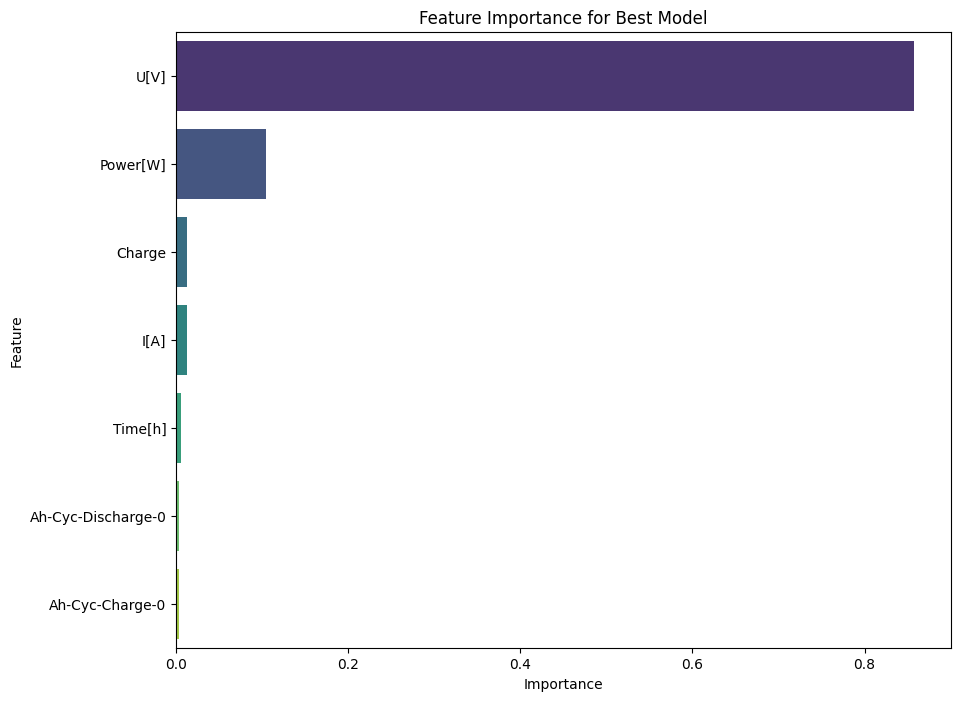

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming RandomForest is selected as the best model
best_model = rf_model # Replace rf_model with the chosen model if different

# Check if the model has feature_importances_ attribute
if hasattr(best_model, 'feature_importances_'):
    # Feature Importance for Random Forest
    feature_importances = best_model.feature_importances_
    features = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance for Best Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("The selected model does not have feature importances.")
